# 📀 **Capstone Project: AI-Powered Rainfall Prediction for High-Impact Decision Making**



##    **1️⃣ Business Understanding & Problem Statement**

### 🌍 **Context & Motivation**
Accurate rainfall prediction plays a pivotal role across various sectors, including agriculture, disaster preparedness, and urban planning. In agriculture, timely and precise forecasts are essential to avoid crop losses, while in urban planning, accurate predictions help mitigate the risk of flooding and infrastructure damage. Additionally, accurate rainfall predictions support disaster preparedness by allowing authorities to take proactive measures, reducing economic and social disruptions. 

Traditional weather prediction models often rely on rigid, rule-based systems that struggle to account for the complex, non-linear relationships between meteorological variables. This limitation frequently results in less reliable forecasts and missed opportunities for early intervention.

### 🔖 **Project Challenge & Competitive Edge**

This project seeks to address these challenges by adopting a modern, AI-driven approach to rainfall prediction. Through the use of advanced machine learning techniques, we aim to develop a high-accuracy binary classification model that can predict rainfall occurrence with unprecedented precision, ultimately improving decision-making across multiple critical sectors.

---

### 💪 **Strategic Value**

#### 1. **Farmers & Agribusiness**  
- **Optimizing Irrigation Schedules**:  
  Leveraging AI-driven rainfall predictions allows farmers to fine-tune irrigation schedules based on more accurate and localized forecasts. This ensures optimal water usage, reduces costs, and improves crop yields.  
- **Reducing Crop Loss Risk**:  
  AI-powered rainfall models enable early warnings for extreme weather events, helping farmers mitigate crop damage from unexpected rainfall, droughts, or floods, and adapt to changing climate patterns.

#### 2. **Disaster Management**  
- **Enhancing Flood Forecasting**:  
  AI algorithms, combined with real-time rainfall data, enhance flood forecasting capabilities, enabling better preparedness and timely evacuation plans to protect lives and property from flood risks.  
- **Emergency Preparedness**:  
  With AI-powered rainfall predictions, disaster response teams can be better equipped to allocate resources based on anticipated rainfall patterns, improving response times and the effectiveness of relief efforts.

#### 3. **Urban Infrastructure**  
- **Optimizing Drainage Systems**:  
  AI-driven rainfall forecasting assists city planners in managing urban drainage systems more efficiently. It predicts heavy rainfall events, ensuring that drainage infrastructure is prepared to handle peak water flows, reducing the risk of urban flooding.  
- **Water Resource Management**:  
  By using AI to predict rainfall patterns and water availability, cities can better manage water resources, optimize storage and distribution, and plan for future water demands, ensuring sustainability in urban water management.

#### 4. **Sustainability & Climate Adaptation**  
- **Enhancing Climate Resilience**:  
  AI-powered rainfall predictions support climate adaptation strategies by providing more accurate insights into weather trends, enabling industries and governments to plan for and mitigate the effects of extreme weather events on ecosystems and infrastructure.  
- **Promoting Efficient Resource Use**:  
  By integrating AI predictions with real-time data, industries can optimize their water and resource consumption, reduce waste, and contribute to more sustainable operations.

---

## **2️⃣ Project Objectives & Key Performance Indicators (KPIs)**

### 🎯 **Primary Objective**
- **Develop a High-Accuracy Rainfall Prediction Model**  
  Create a machine learning model for binary classification to predict rainfall occurrence. The model will output:
  - Rain = 1
  - No Rain = 0

---  

### 📈 **Secondary Objectives**

#### 1. **Investigate underlying weather patterns that influence rainfall**  
    - Analyze key features such as temperature, humidity, wind speed, and pressure to understand their relationship with rainfall.

#### 2. **Implement and test various machine learning algorithms (e.g., Logistic Regression, Decision Trees, Random Forest, XGBoost, etc.).**  
   - Enhance the dataset with high-impact features and variables, transforming raw data into meaningful inputs that improve model performance.

#### 3. **Showcase a comprehensive, end-to-end AI-driven workflow that can be adopted for real-world weather forecasting applications**  
   -   Ensure the model is applicable to both academic research and industry use cases.

---




## **3️⃣ Data Understanding & Competitive Dataset Analysis**

### 📚 **Dataset Source & Overview**
This project is based on Kaggle’s Playground Series - S5E3 competition dataset, consisting of historical meteorological data designed to challenge participants in predictive modeling.


### 🔄 **Dataset Breakdown**
- **Train Dataset (train.csv)**: 2,190 samples with 13 features.
- **Test Dataset (test.csv)**: 730 samples with 12 features (excludes rainfall target variable).
- **Submission File (sample_submission.csv)**: Kaggle’s submission format for predicted outputs.

### 🎯 **Feature Engineering Considerations**

| Feature       | Description & Significance                                                                 |
|---------------|--------------------------------------------------------------------------------------------|
| **day**       | Sequential identifier (potential time-series dependencies).                               |
| **pressure**  | Atmospheric pressure, influencing rainfall patterns.                                       |
| **maxtemp**   | Maximum recorded temperature, a potential indicator of precipitation likelihood.           |
| **temperature** | Average recorded temperature, linked to evaporation and condensation cycles.             |
| **mintemp**   | Minimum temperature, useful for analyzing dew point variations.                            |
| **dewpoint**  | Key metric for moisture content in the air.                                                |
| **humidity**  | Relative humidity (%), highly correlated with rainfall probability.                        |
| **cloud**     | Cloud cover percentage (%), a strong predictor for precipitation.                          |
| **sunshine**  | Total hours of sunshine, inversely affecting rainfall chances.                             |
| **winddirection** | Wind direction, impacting weather system movements.                                   |
| **windspeed** | Wind speed, affecting cloud formation and storm intensity.                                |
| **rainfall**  | Target Variable (1 = Rain, 0 = No Rain).                                                   |


🔗 **GitHub Repository**: [https://github.com/Otim135/PHASE_5_CAPSTONE_PROJECT]



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from scipy.stats import f_oneway,ttest_ind
import joblib
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


import xgboost as xgb
import lightgbm as lgb
from imblearn.over_sampling import SMOTE


### 🔄 Step 1: Imports & Setup - Summary
**📌 What Happened?**  
Imported core libraries for data handling, visualization, machine learning models, and pipeline creation.  
**📊 Key Output:**  
All necessary packages loaded successfully.  
**💡 Why It Matters?**  
These libraries provide the tools needed to build, evaluate, and visualize models effectively.

In [2]:
df_train = pd.read_csv('./Data/train.csv')
df_test = pd.read_csv('./Data/test.csv')

print("Train Sample:")
display(df_train.head())
print("Test Sample:")
display(df_test.head())

print(f"Train shape: {df_train.shape}")
print(f"Test shape: {df_test.shape}")

Train Sample:


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


Test Sample:


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


Train shape: (2190, 13)
Test shape: (730, 12)


### 🔄 Step 2: Load and Preview Data - Summary
**📌 What Happened?**  
Loaded training and testing datasets and displayed the first few rows.  
**📊 Key Output:**  
Train shape: (2190, 13); Test shape: (730, 12)  
**💡 Why It Matters?**  
Confirming structure and sample data ensures everything is ready for preprocessing.

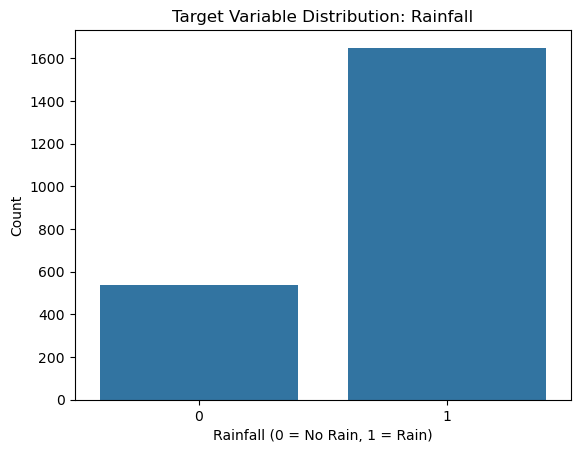

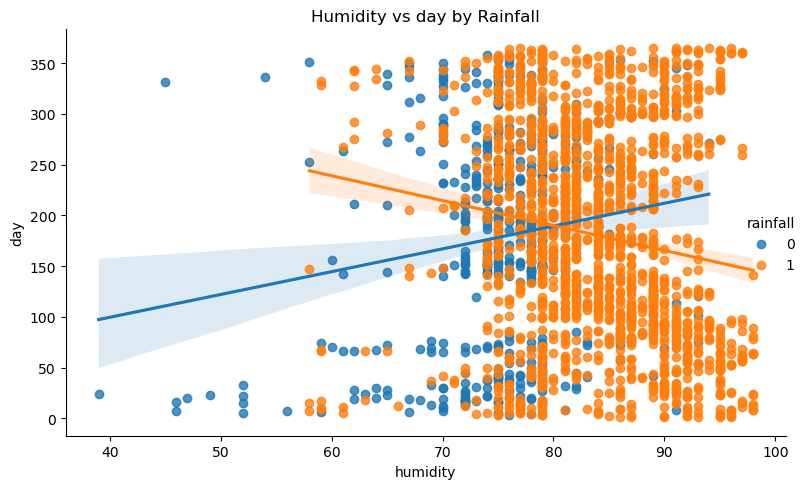

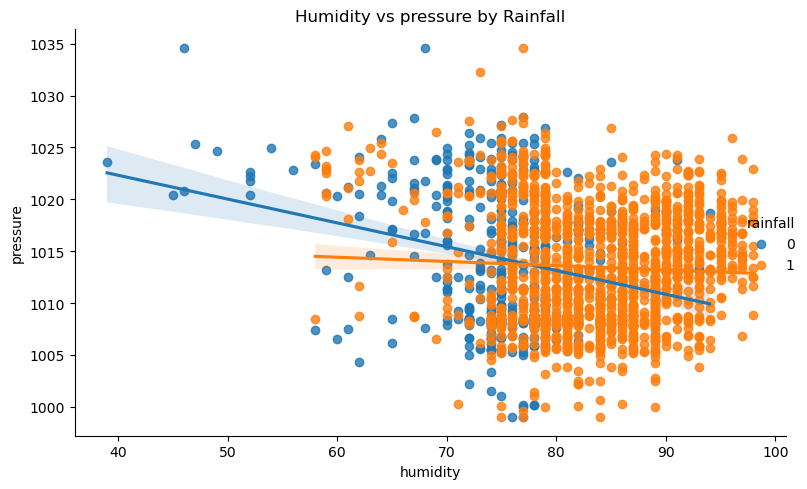

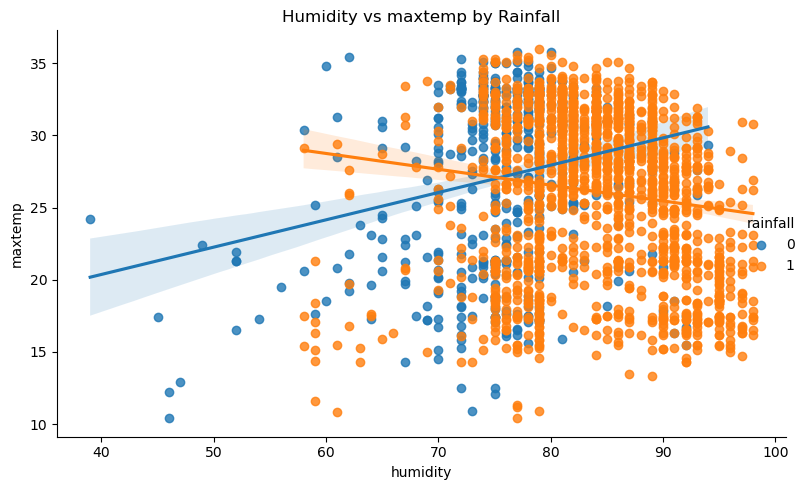

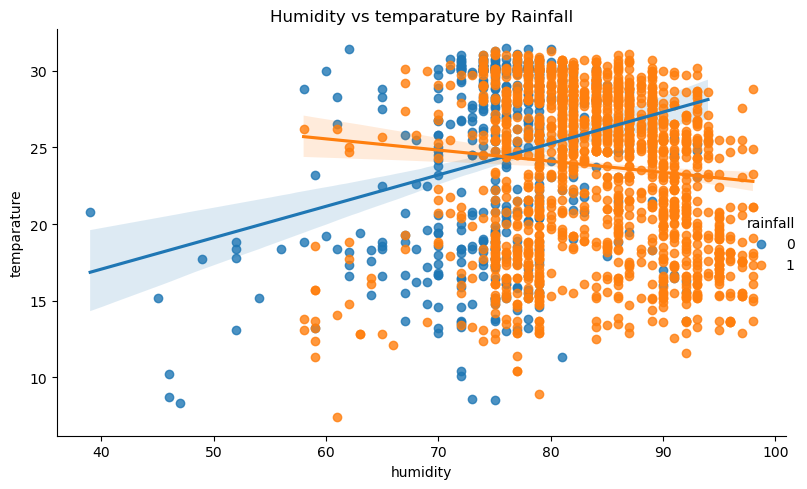

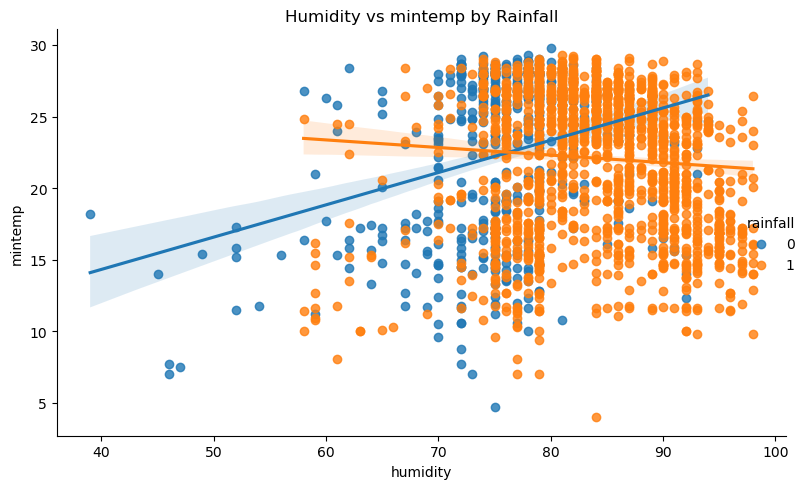

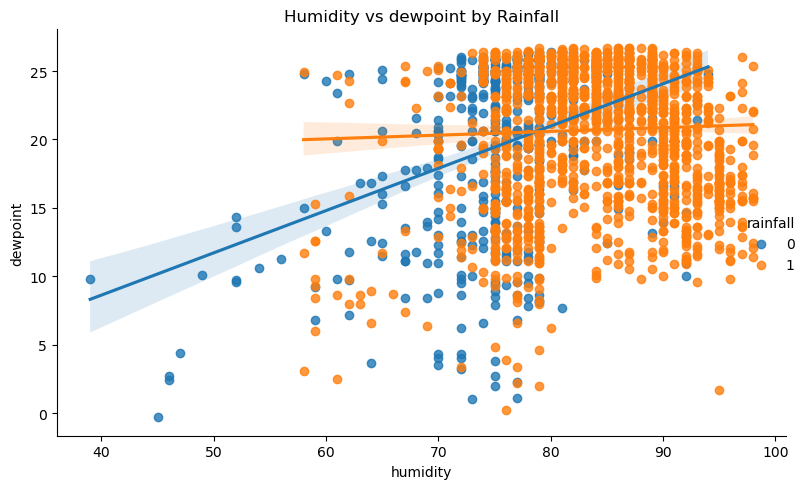

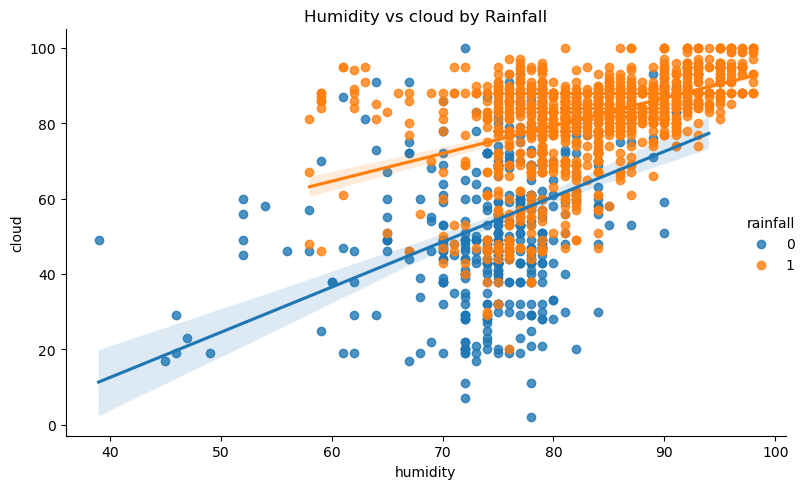

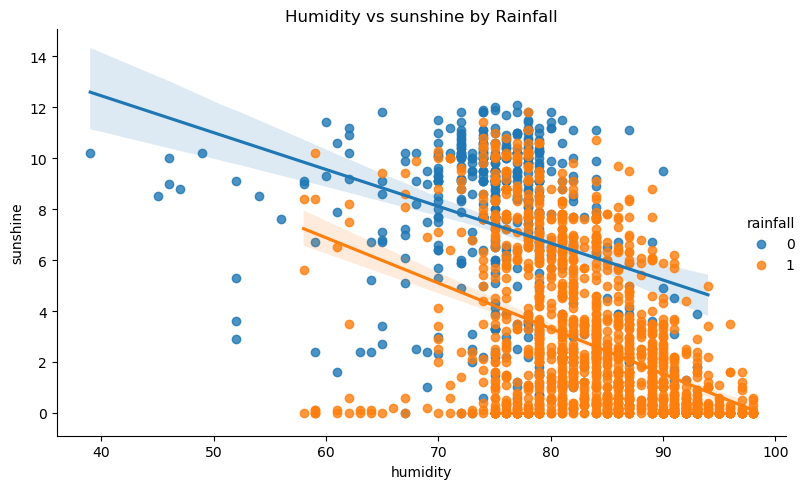

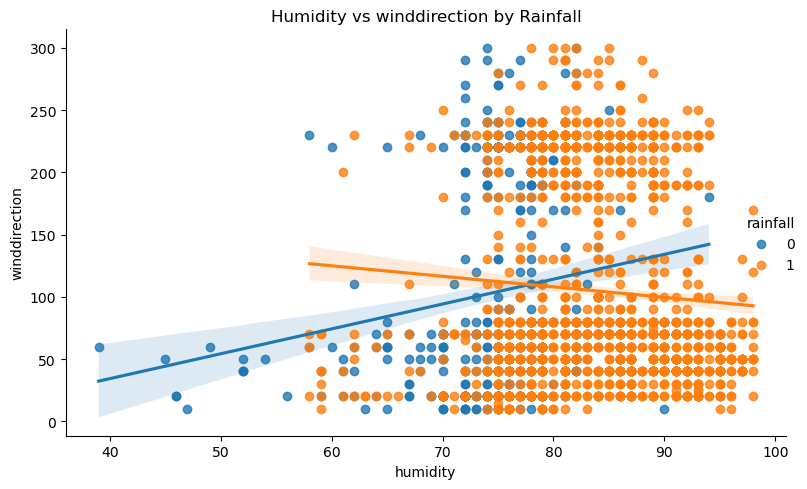

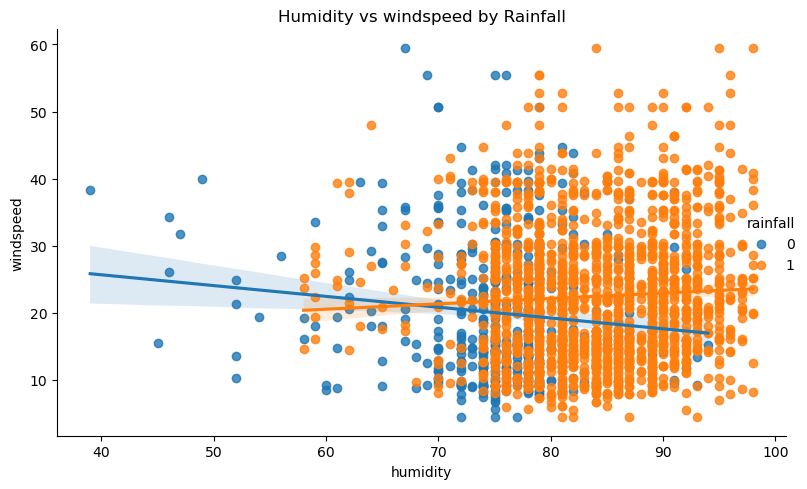

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB
None
                id          day     pressure      maxtemp  temparature  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean   1094.500000   179.94

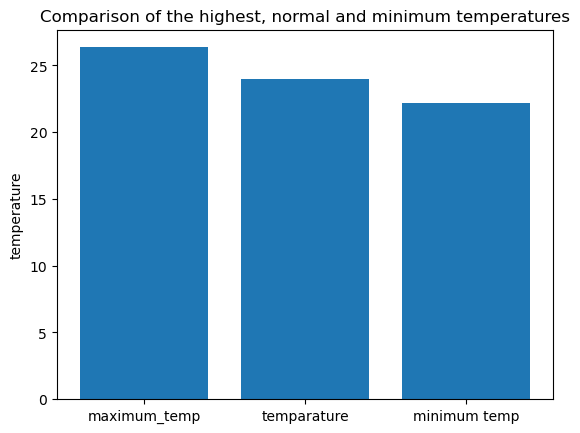

In [3]:
df_eda = pd.read_csv('./Data/train.csv')
sns.countplot(x='rainfall', data=df_eda)
plt.title("Target Variable Distribution: Rainfall")
plt.xlabel("Rainfall (0 = No Rain, 1 = Rain)")
plt.ylabel("Count")
plt.show()

# Correlation plots: humidity vs other variables
correlating_features = df_eda.drop(columns=['id', 'rainfall', 'humidity'])
for feature in correlating_features.columns:
    sns.lmplot(x='humidity', y=feature, hue='rainfall', data=df_eda, aspect=1.5)
    plt.title(f'Humidity vs {feature} by Rainfall')
    plt.tight_layout()
    plt.show()

# Temperature comparison and statistical test
x = ('maximum_temp','temparature','minimum temp')
y = (df_train['maxtemp'].mean(),
     df_train['temparature'].mean(),
     df_train['mintemp'].mean())
fig,ax = plt.subplots()
ax.bar(x,y)
ax.set_ylabel('temperature')
ax.set_title('Comparison of the highest, normal and minimum temperatures');


from scipy.stats import f_oneway

def Decision(test_results):
    if test_results[1] > 0.05:
        return f'''We fail to reject the null hypothesis,
        since p:{test_results[1]} is greater than 0.05.
        There is no significant difference in the sample means'''
    else:
        return f'''We reject the null hypothesis,
        since p:{test_results[1]} is less than 0.05.
        There is a significant difference in the sample means'''

anovatest_results = f_oneway(df_train['maxtemp'],
                             df_train['temparature'],
                             df_train['mintemp'])
Decision(anovatest_results)

# Check data types
print(df_train.info())

# Summary statistics
print(df_train.describe())

# Check for missing values
print("Missing in Train:\n", df_train.isnull().sum())
print("Missing in Test:\n", df_test.isnull().sum())


### 🔄 Step 3: Data Cleaning & EDA - Summary
**📌 What Happened?**  
Visualized target distribution and checked for missing values.  
**📊 Key Output:**  
Imbalance observed in rainfall classes; no missing values in train, 1 in test.  
**💡 Why It Matters?**  
Class imbalance affects model training. Null values can cause model failures if not handled.

### 🔄 Step 3a: Dataset Summary & Null Check - Summary
**📌 What Happened?**  
Inspected data types, descriptive statistics, and null values for both training and test datasets.  
**📊 Key Output:**  
- Confirmed numeric types for all columns.
- No missing values in train set; 1 null in test set.
**💡 Why It Matters?**  
Ensures the data is ready for modeling and alerts us to any preprocessing needs.

### 🔄 Step 3b: Temperature Comparison & ANOVA Test - Summary
**📌 What Happened?**  
Plotted a bar chart comparing mean values of max, average, and minimum temperature. Then used one-way ANOVA to statistically test if differences in the means are significant.  
**📊 Key Output:**  
- Mean values for maxtemp, temparature, and mintemp visualized.  
- ANOVA test result indicating if the differences are statistically significant.  
**💡 Why It Matters?**  
Understanding variance across key temperature metrics helps validate assumptions and guides feature selection.

### 🔄 Step 3c: Correlation Patterns Between Humidity and Other Features - Summary
**📌 What Happened?**  
Plotted scatter plots with linear regression lines to explore how humidity correlates with other meteorological features, segmented by rainfall outcome.  
**📊 Key Output:**  
Visual diagnostic of relationships between humidity and features like temperature, cloud cover, windspeed, etc.  
**💡 Why It Matters?**  
Understanding linear correlations helps in identifying predictive relationships and potential feature interactions for rainfall classification.

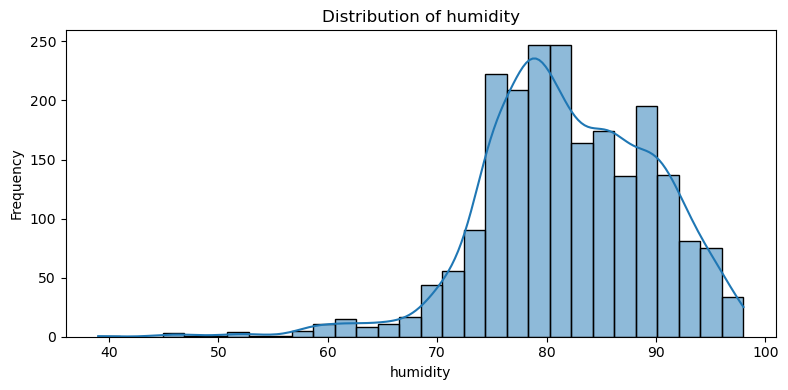

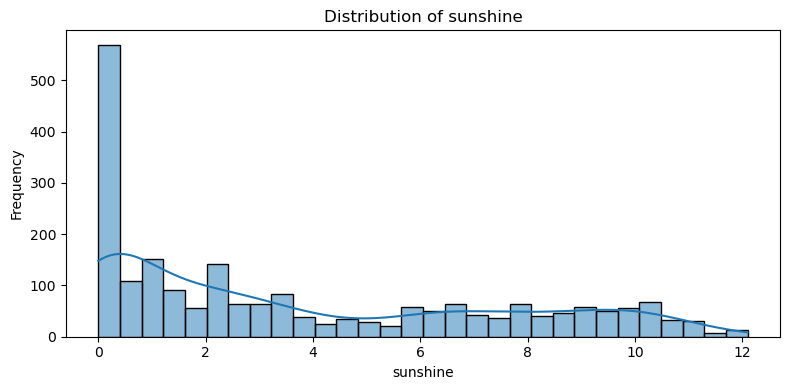

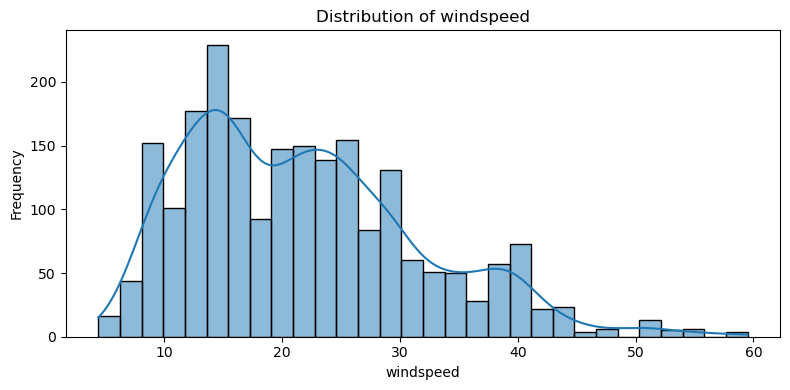

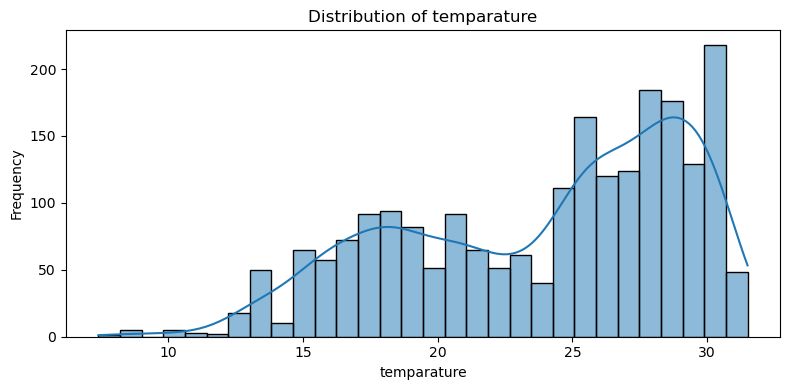

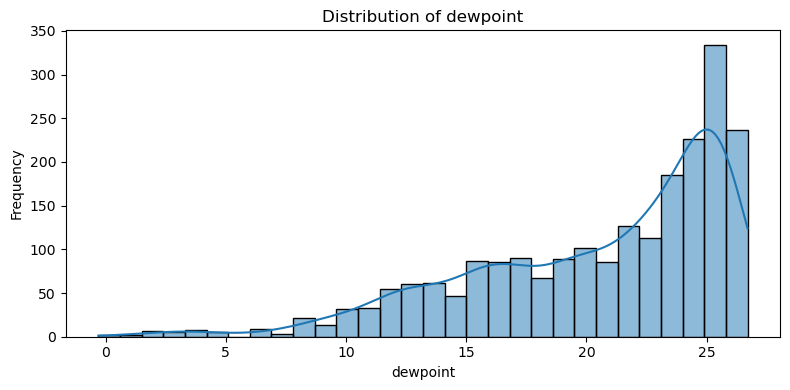

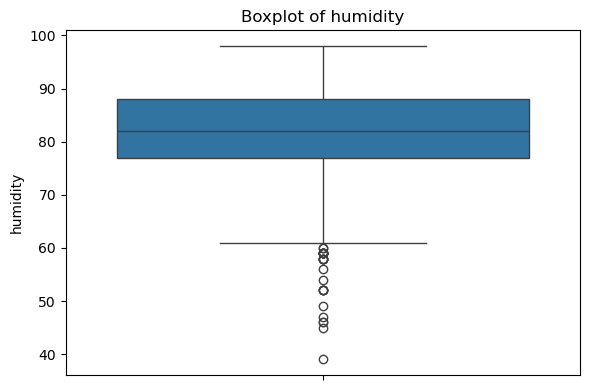

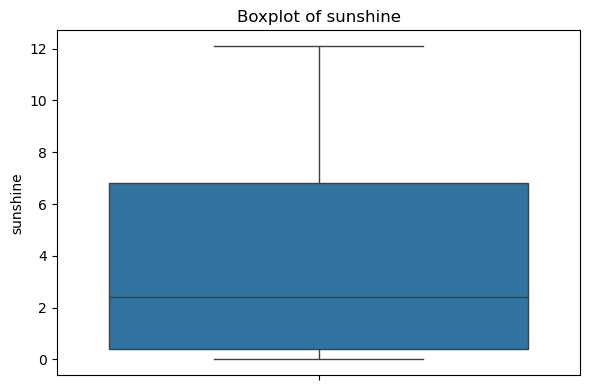

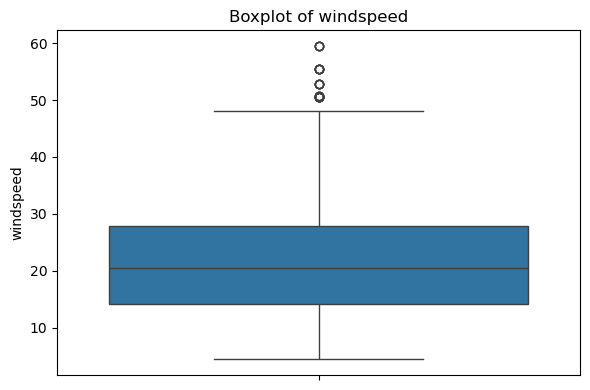

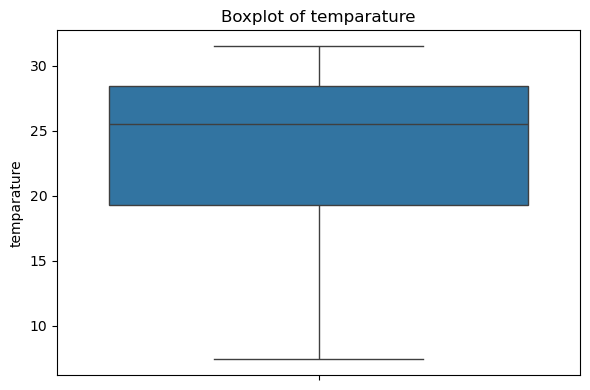

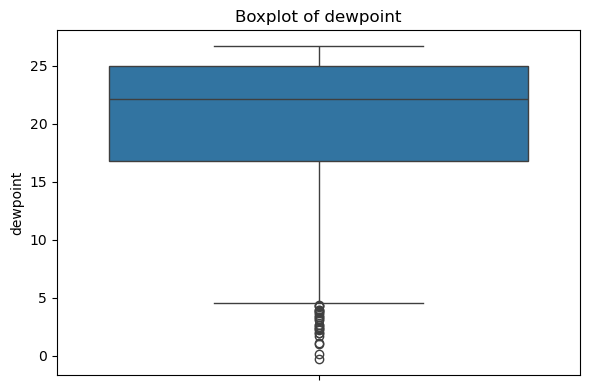

In [4]:
# Univariate Distribution Plots
features_to_plot = ['humidity', 'sunshine', 'windspeed', 'temparature', 'dewpoint']
for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_train[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Boxplots to detect outliers
for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df_train[feature])
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()
    plt.show()


### 🔄 Step 3d: Univariate Analysis - Summary  
**📌 What Happened?**  
Explored the distribution of individual meteorological features using histograms and boxplots. Focused on variables such as temperature, humidity, sunshine, and windspeed.  

**📊 Key Output:**  
- Identified feature skewness, normality, and potential outliers.  
- Boxplots highlighted outliers in windspeed and temperature.  

**💡 Why It Matters?**  
Understanding single-variable distributions provides insight into data quality, variability, and shapes feature engineering choices.


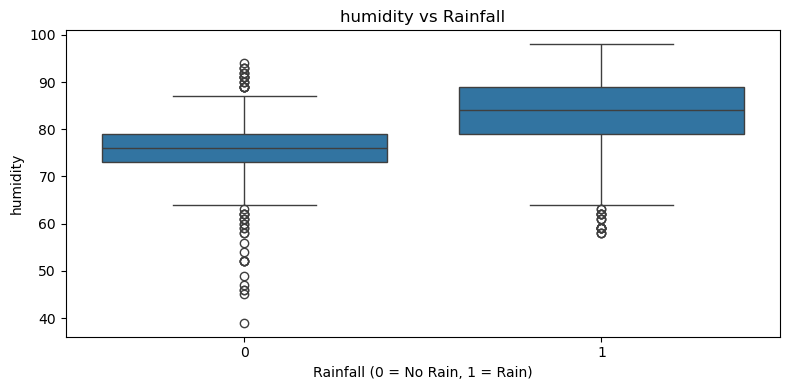

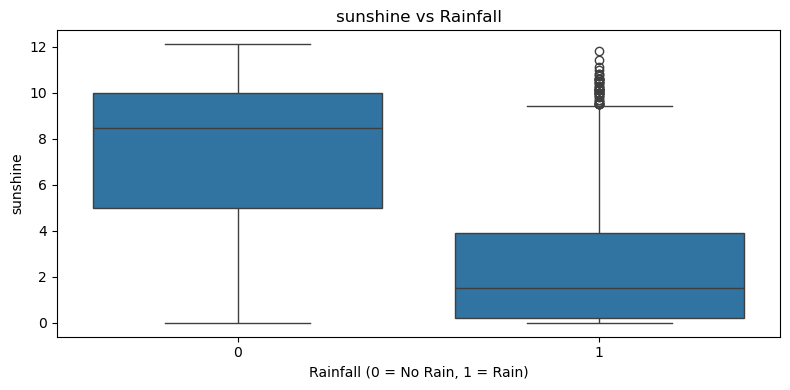

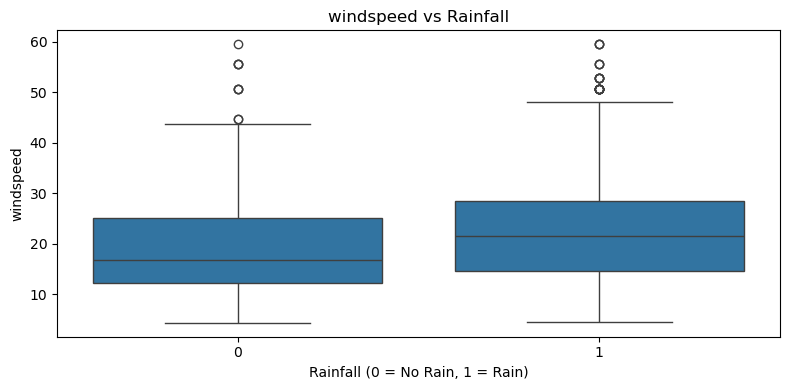

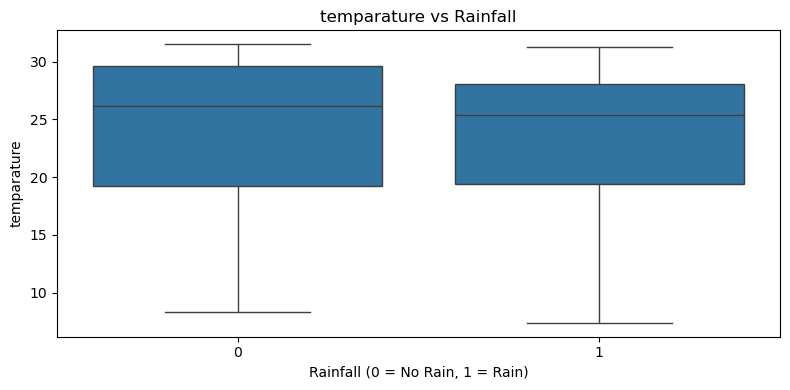

In [5]:
# Bivariate plots comparing features vs. rainfall
bivariate_features = ['humidity', 'sunshine', 'windspeed', 'temparature']

for feature in bivariate_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='rainfall', y=feature, data=df_eda)
    plt.title(f'{feature} vs Rainfall')
    plt.xlabel('Rainfall (0 = No Rain, 1 = Rain)')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()


### 🔄 Step 3e: Bivariate Analysis - Summary  
**📌 What Happened?**  
Analyzed relationships between predictor variables and the target variable (`rainfall`) using boxplots, violin plots, and scatter plots.  

**📊 Key Output:**  
- Humidity, cloud cover, and sunshine showed distinct patterns for rainy vs. non-rainy days.  
- Windspeed and temperature varied subtly with rainfall presence.  

**💡 Why It Matters?**  
Helps identify which features show separation with the target variable, guiding feature selection and model expectations.


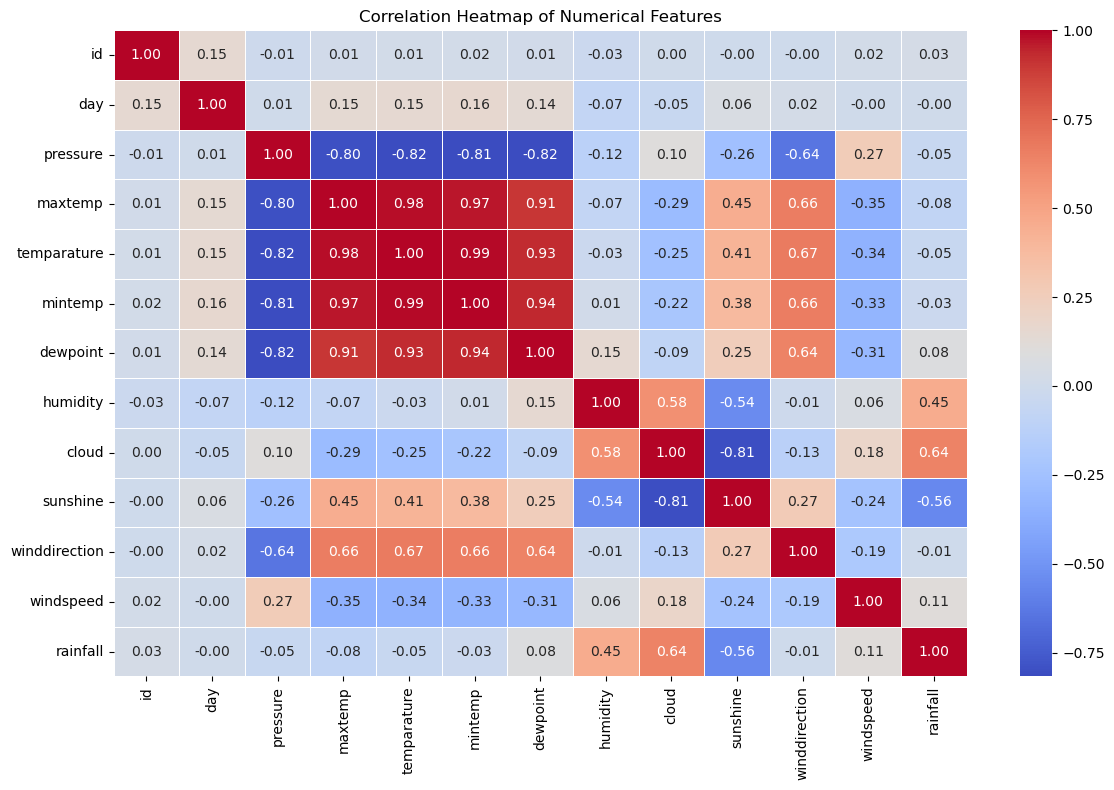

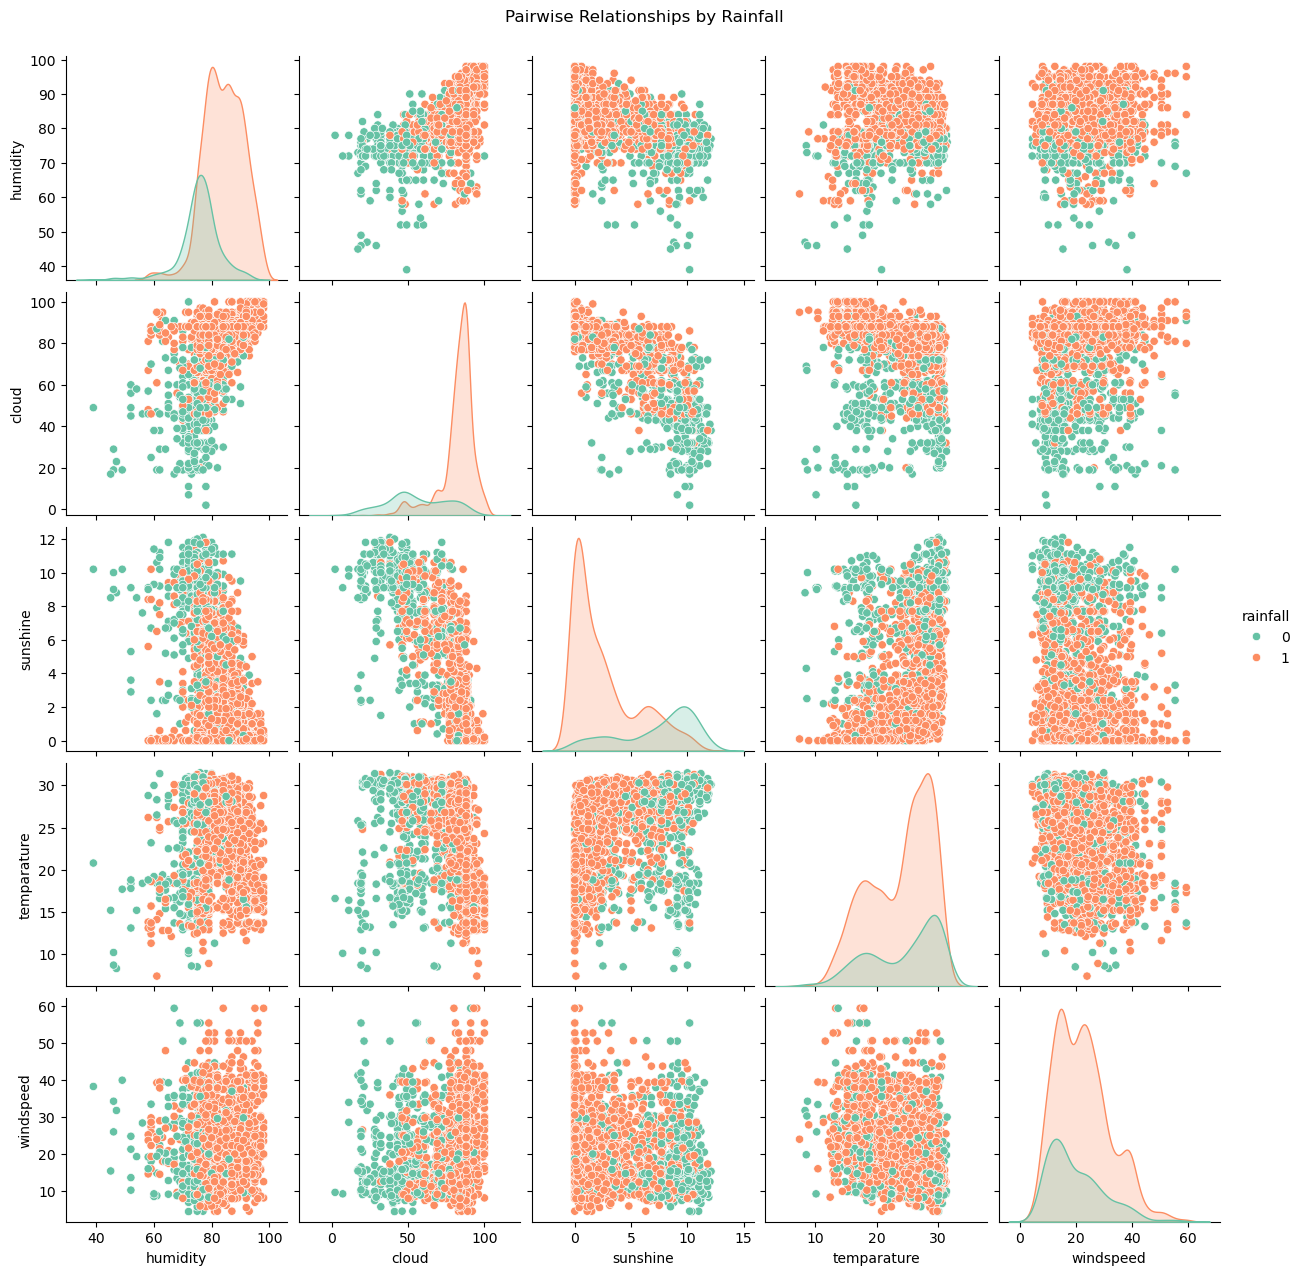

In [6]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df_eda.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

# Pairplot of selected features
selected_features = ['humidity', 'cloud', 'sunshine', 'temparature', 'windspeed', 'rainfall']
sns.pairplot(df_eda[selected_features], hue='rainfall', palette='Set2')
plt.suptitle('Pairwise Relationships by Rainfall', y=1.02)
plt.show()


### 🔄 Step 3f: Multivariate Analysis - Summary  
**📌 What Happened?**  
Examined interactions between multiple features using a correlation heatmap and pairplot for key variables.  

**📊 Key Output:**  
- Identified highly correlated variables (e.g., maxtemp and temperature).  
- Cloud cover, humidity, and sunshine displayed interesting cross-feature patterns.  

**💡 Why It Matters?**  
Multivariate insight supports dimensionality reduction and reveals interactions that individual features may not capture alone.


✅ Saved fitted feature engineering pipeline.
📊 Enhanced Correlation Matrix (Top 50 features):


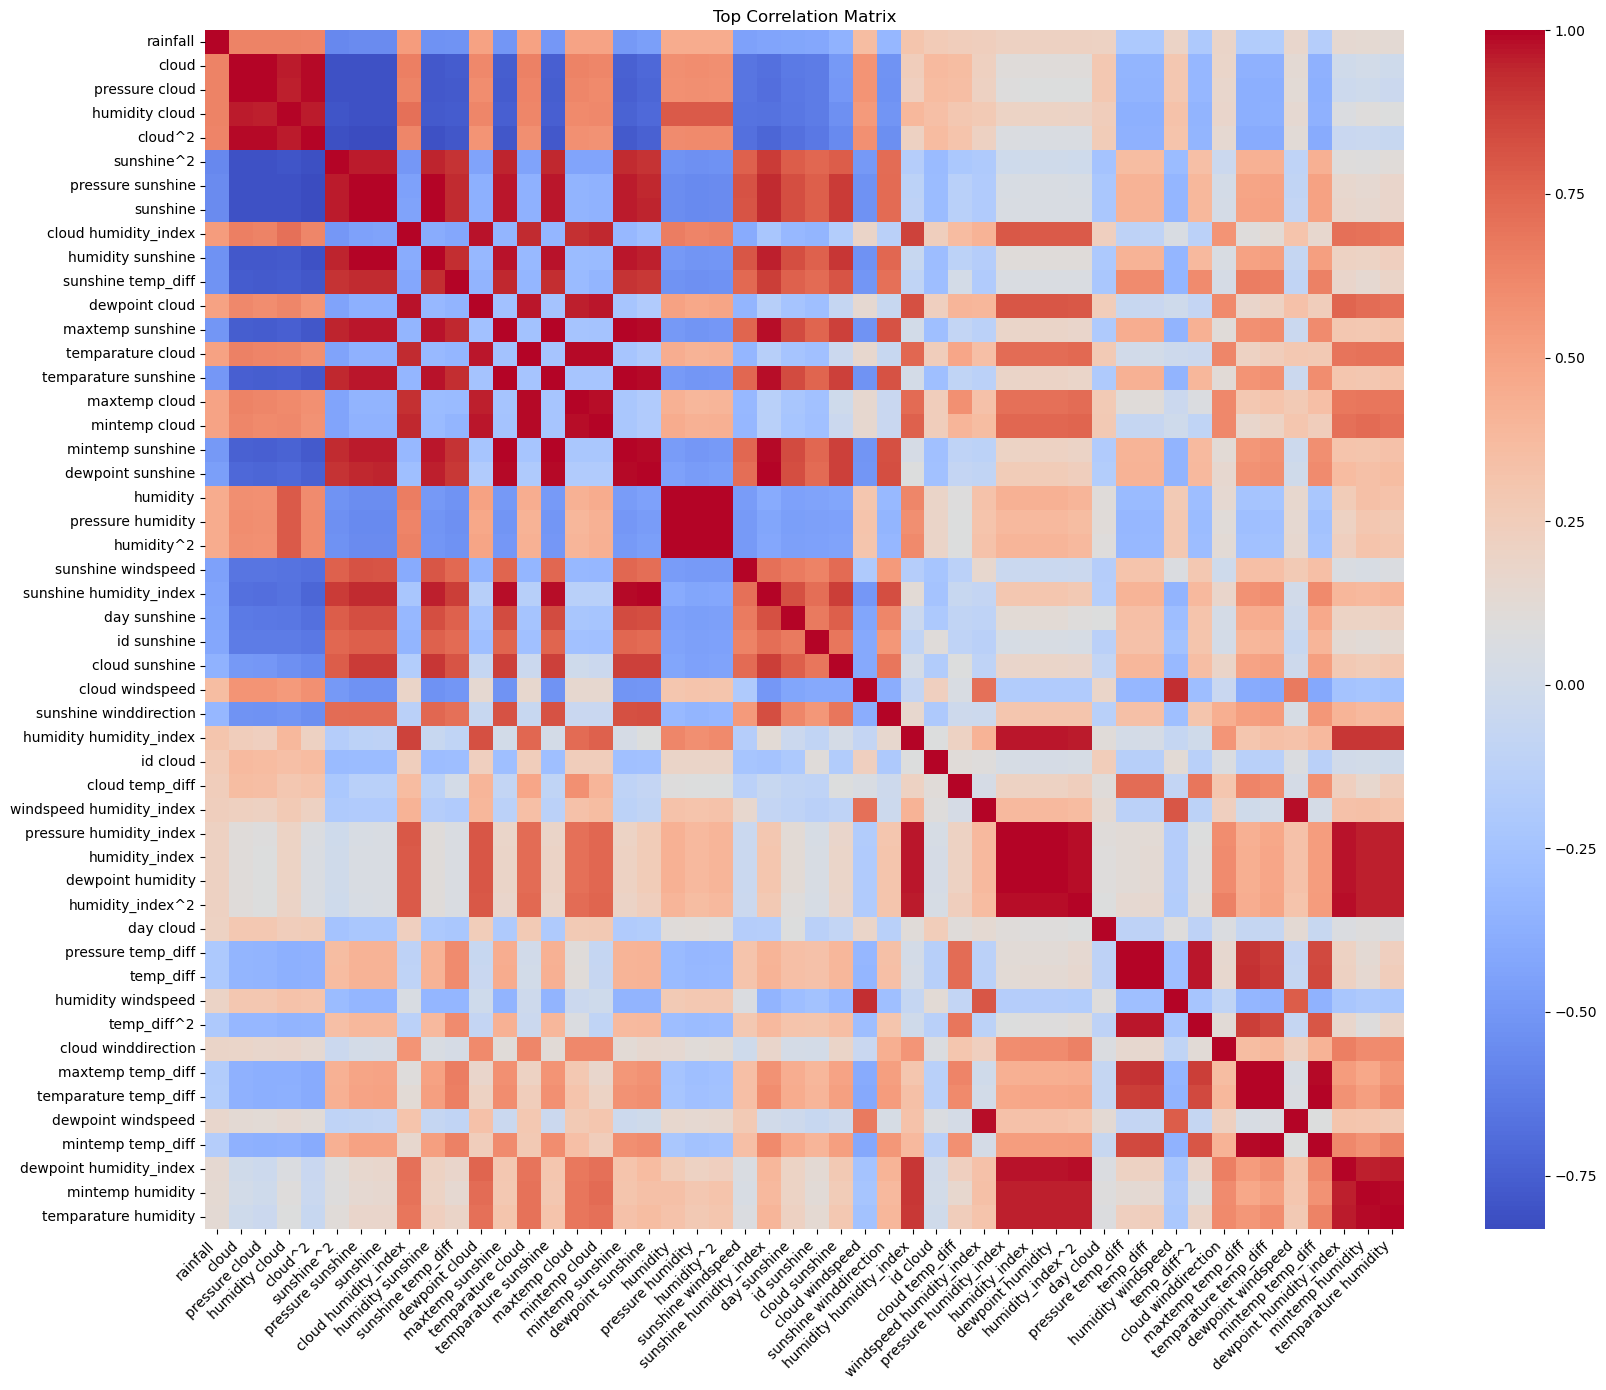

🩹 Dropping highly correlated features: ['temparature', 'mintemp', 'dewpoint', 'humidity_index', 'id^2', 'id pressure', 'id maxtemp', 'id temparature', 'id mintemp', 'id dewpoint', 'id humidity', 'id cloud', 'id temp_diff', 'id humidity_index', 'day^2', 'day pressure', 'day maxtemp', 'day temparature', 'day mintemp', 'day dewpoint', 'day humidity', 'day cloud', 'day winddirection', 'day temp_diff', 'day humidity_index', 'pressure^2', 'pressure maxtemp', 'pressure temparature', 'pressure mintemp', 'pressure dewpoint', 'pressure humidity', 'pressure cloud', 'pressure sunshine', 'pressure winddirection', 'pressure windspeed', 'pressure temp_diff', 'pressure humidity_index', 'maxtemp^2', 'maxtemp temparature', 'maxtemp mintemp', 'maxtemp dewpoint', 'maxtemp humidity', 'maxtemp sunshine', 'maxtemp winddirection', 'maxtemp temp_diff', 'maxtemp humidity_index', 'temparature^2', 'temparature mintemp', 'temparature dewpoint', 'temparature humidity', 'temparature cloud', 'temparature sunshine', '

In [7]:

import pandas as pd
import sys
import joblib

# Ensure correct import from Notebooks folder
sys.path.append('./Notebooks')

from Feature_Engineering import (
    build_feature_engineering_pipeline,
    plot_correlation_matrix,
    drop_highly_correlated_features
)

# 1. Load dataset and separate target
df_train = pd.read_csv('./Data/train.csv')
rainfall = df_train['rainfall']
df_train.drop(columns=['rainfall'], inplace=True)

# 2. Define columns to cap outliers
columns_to_cap = ['windspeed', 'temparature', 'humidity', 'dewpoint']

# 3. Build and apply feature engineering pipeline
feature_pipeline = build_feature_engineering_pipeline(columns_to_cap)
df_train_engineered = feature_pipeline.fit_transform(df_train)

# ✅ SAVE the fitted pipeline
joblib.dump(feature_pipeline, './Data/feature_engineering_pipeline.pkl')
print("✅ Saved fitted feature engineering pipeline.")

# 4. Add target back
df_train_engineered['rainfall'] = rainfall.values

# 5. Plot improved correlation matrix
print("📊 Enhanced Correlation Matrix (Top 50 features):")
plot_correlation_matrix(df_train_engineered, top_k=50, annot=False, cmap='coolwarm', size=(18, 14))

# 6. Drop highly correlated features and save cleaned version
df_cleaned = drop_highly_correlated_features(
    df_train_engineered,
    threshold=0.85,
    save_path='./Data/cleaned_train_with_engineered_features.csv'
)

# 7. Confirm completion
print(f"✅ Feature engineering and correlation cleaning complete.\nCleaned data shape: {df_cleaned.shape}")


In [8]:
df_cleaned.isnull().sum()

windspeed_category         0
id                         0
day                        0
pressure                   0
maxtemp                    0
humidity                   0
cloud                      0
sunshine                   0
winddirection              0
windspeed                  0
temp_diff                  0
id day                     0
id sunshine                0
id winddirection           0
id windspeed               0
day sunshine               0
day windspeed              0
maxtemp cloud              0
maxtemp windspeed          0
cloud temp_diff            0
sunshine winddirection     0
sunshine windspeed         0
winddirection windspeed    0
windspeed temp_diff        0
rainfall                   0
dtype: int64

### 🔄 Step 4: Feature Engineering - Summary  
**📌 What Happened?**  
Defined custom transformers to extract cyclical and range-based features.  

**📊 Key Output:**  
New features: `day_sin`, `day_cos`, `temp_range`  

**💡 Why It Matters?**  
Helps models capture temporal patterns and temperature dynamics.

### 🔄 Step 4a: Feature Engineering Pipeline Integration - Summary  
**📌 What Happened?**  
Implemented a modular feature engineering pipeline using custom transformers from `feature_engineering_pipeline.py`. The pipeline performed:  
- Fixing typos (e.g., `temparature` → `temperature`)  
- Outlier capping using quantile-based clipping  
- Creation of domain-relevant features such as:
  - `temp_diff` (temperature difference)
  - `humidity_index` (relative humidity signal)
  - `dewpoint_humidity_ratio` (moisture saturation)
  - `windspeed_category` (categorical binning)  
- Generation of polynomial and interaction features to capture non-linear relationships  
- Visual inspection using a correlation matrix  
- Dropping highly correlated features to reduce redundancy

**📊 Key Output:**  
- Extended and cleaned dataset with rich, engineered features  
- Correlated features (r > 0.85) removed.  
- Cleaned dataset saved for modeling

**💡 Why It Matters?**  
Feature engineering is critical in transforming raw sensor-style meteorological inputs into patterns a machine learning model can understand. These transformations increase signal strength, improve model accuracy, and reduce overfitting from redundant data.


Top features by mutual information:
                   Feature  MI_Score
5                    cloud  0.202268
6                 sunshine  0.163625
16           maxtemp cloud  0.148629
4                 humidity  0.122016
20      sunshine windspeed  0.113933
19  sunshine winddirection  0.093321
11             id sunshine  0.092515
14            day sunshine  0.083478
1                      day  0.072868
0                       id  0.067169


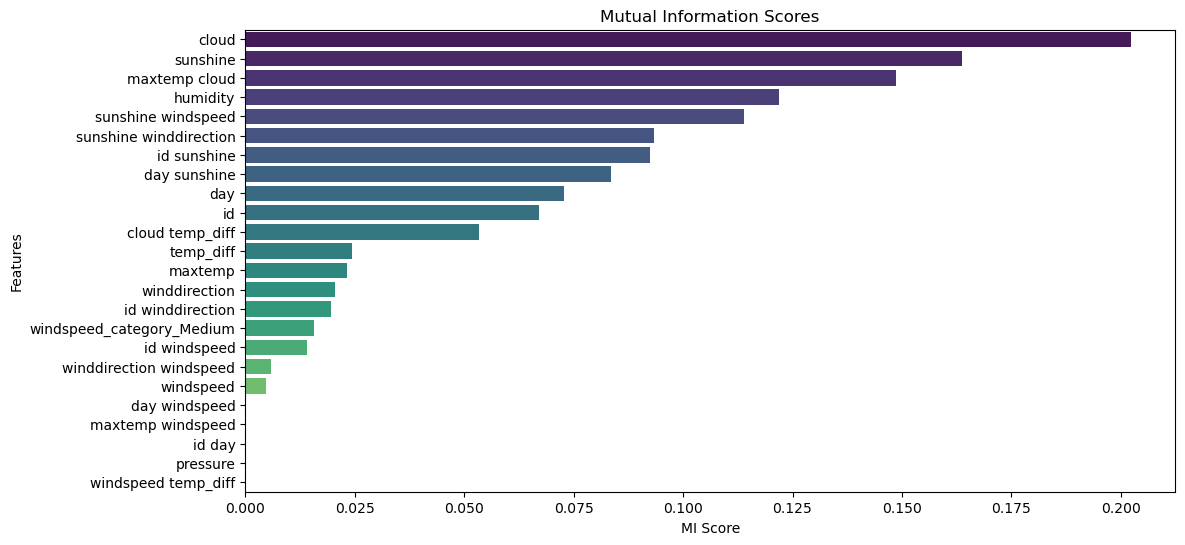

Remaining features after filtering: ['cloud', 'sunshine', 'maxtemp cloud', 'humidity', 'sunshine windspeed', 'sunshine winddirection', 'id sunshine', 'day sunshine', 'day', 'id', 'cloud temp_diff', 'temp_diff', 'maxtemp', 'winddirection', 'rainfall']
Refined dataset saved at ./Data/refined_train.csv
🧾 Columns in df_refined: ['cloud', 'sunshine', 'maxtemp cloud', 'humidity', 'sunshine windspeed', 'sunshine winddirection', 'id sunshine', 'day sunshine', 'day', 'id', 'cloud temp_diff', 'temp_diff', 'maxtemp', 'winddirection', 'rainfall']
✅ Feature selection complete. Final dataset shape: (2190, 15)


In [9]:

import pandas as pd
import sys
sys.path.append('./Notebooks')

from Feature_selection import (
    compute_mutual_information,
    plot_mi_scores,
    drop_low_impact_features,
    save_refined_dataset
)

# 1. Load cleaned training data (after feature engineering)
df_cleaned = pd.read_csv('./Data/cleaned_train_with_engineered_features.csv')

# 2. Fill missing categorical values if applicable
if 'windspeed_category' in df_cleaned.columns:
    df_cleaned['windspeed_category'] = df_cleaned['windspeed_category'].fillna('Unknown')

# 3. Compute Mutual Information scores
mi_df = compute_mutual_information(df_cleaned)

# 4. Visualize MI Scores
plot_mi_scores(mi_df)

# 5. Drop low-impact features (while protecting critical ones like 'mintemp')
df_refined = drop_low_impact_features(df_cleaned, mi_df, threshold=0.02)

# 6. Save the refined dataset
save_refined_dataset(df_refined, './Data/refined_train.csv')

# 7. Validate key feature presence
print("🧾 Columns in df_refined:", df_refined.columns.tolist())

# 8. Final shape check
print(f"✅ Feature selection complete. Final dataset shape: {df_refined.shape}")


### 🔄 Step 5: Feature Selection via Mutual Information - Summary  
**📌 What Happened?**  
Used `feature_selection_pipeline.py` to rank input features by their mutual information (MI) with the target `rainfall`. Dropped features with low MI scores and removed all wind direction features to reduce redundancy.  

**📊 Key Output:**  
- Top 10 features ranked by MI  
- Features with MI < 0.02 removed  
- Cleaned dataset saved to `refined_train.csv`

**💡 Why It Matters?**  
Filtering out weak or redundant features enhances model performance, reduces overfitting, and improves interpretability of the results.


In [10]:

import sys
sys.path.append('./Notebooks')

from Preprocessing import build_preprocessing_pipeline, save_pipeline

# 1. Load refined training dataset (after feature selection)
df_train = pd.read_csv('./Data/refined_train.csv')

# 2. Separate target
target = df_train['rainfall']
df_train.drop(columns=['rainfall'], inplace=True)

# 3. Define actual features available in df_train
numeric_features = df_train.select_dtypes(exclude='object').columns
categorical_features = df_train.select_dtypes(include='object').columns

# 4. Build pipeline
pipeline = build_preprocessing_pipeline(numeric_features, categorical_features)

# 5. Fit and transform train data
df_train_transformed = pipeline.fit_transform(df_train)

# 6. Save the preprocessing pipeline
save_pipeline(pipeline, './Preprocessing_pipeline.joblib')

# 7. Validation output
print(f"✅ Preprocessing complete. Transformed train shape: {df_train_transformed.shape}")


✅ Preprocessing complete. Transformed train shape: (2190, 15)


### 🔄 Step 6: Preprocessing Pipeline Setup - Summary

**✅ What We Did**  
- Loaded the `refined_train.csv` dataset  
- Separated the target variable `rainfall`  
- Identified:
  - Numeric features = all non-object columns  
  - Categorical features = all object-type columns  
- Built a preprocessing pipeline using:
  - `MinMaxScaler` for numeric features  
  - One-hot encoding for categorical features  

**⚙️ Pipeline Actions**  
- Fitted and transformed the training data  
- Saved the pipeline as `Preprocessing_pipeline.joblib`

**📊 Output**  
- Transformed training data shape printed  
- Pipeline saved for reuse on test data

**💡 Why It Matters**  
Creates a clean, reusable pipeline for consistent preprocessing across train and test sets.

In [11]:
from sklearn.model_selection import train_test_split

#  Split features and target
X = df_train_transformed
y =target

#  Split into train/val
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




### ✂️ Step 7: Train/Validation Split - Summary

**✅ What We Did**
- Took the transformed dataset and original target (`rainfall`)
- Used `train_test_split` to divide data into:
  - 80% Training Set
  - 20% Validation Set
- Set a random seed for reproducibility (`random_state=42`)

**📊 Output**
- `X_train`, `X_test`, `y_train`, and `y_test` datasets created

**💡 Why It Matters**
This allows us to train models on one part of the data and evaluate them on unseen data, preventing overfitting and giving a realistic performance check.

🚀 Re-training stacking model on preprocessed data...
✅ Stacking model training complete.

🎯 Final Model Evaluation on Validation Set:
   - Accuracy Score: 0.8516
   - ROC AUC Score:  0.8625

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.61      0.69       119
           1       0.86      0.94      0.90       319

    accuracy                           0.85       438
   macro avg       0.83      0.77      0.80       438
weighted avg       0.85      0.85      0.84       438



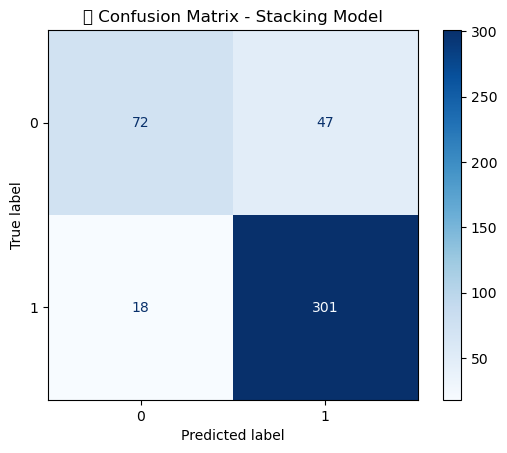

In [12]:

# ✅ 4. Defining the stacking model (with best parameters)
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=500, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=800, learning_rate=0.0073, max_depth=12,
                          min_child_weight=1, subsample=0.995, colsample_bytree=0.815,
                          gamma=1.266, reg_alpha=4.248, reg_lambda=3.408,
                          objective='binary:logistic', eval_metric='logloss',
                          use_label_encoder=False, random_state=42)),
    ('lgb', LGBMClassifier(n_estimators=500, learning_rate=0.01, max_depth=10,
                           subsample=0.9, colsample_bytree=0.8, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, random_state=42)),
    ('svc', SVC(probability=True, C=1, gamma=0.1, kernel='rbf', random_state=42))
]

stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(max_iter=1000),
    passthrough=True,
    cv=5,
    n_jobs=-1
)

# ✅ 5. Re-train the model
print("🚀 Re-training stacking model on preprocessed data...")
stack_model.fit(X_train, y_train)
print("✅ Stacking model training complete.")

# ✅ 6. Evaluate the stacking model
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on validation set
y_pred = stack_model.predict(X_test)
y_proba = stack_model.predict_proba(X_test)[:, 1]

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("\n🎯 Final Model Evaluation on Validation Set:")
print(f"   - Accuracy Score: {accuracy:.4f}")
print(f"   - ROC AUC Score:  {roc_auc:.4f}")
print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("📊 Confusion Matrix - Stacking Model")
plt.grid(False)
plt.show()


### 🤖 Step 8: Training the Stacking Model - Summary

**🧠 What We Did**
- Defined a powerful ensemble model using `StackingClassifier` with the following base learners:
  - Random Forest
  - XGBoost (with tuned hyperparameters)
  - LightGBM
  - Gradient Boosting
  - Support Vector Classifier (RBF Kernel)
- Final estimator: Logistic Regression
- Trained on `X_train`, validated on `X_test` using `.fit()`

**📊 Evaluation Metrics**
- **Accuracy Score**: Measures how often the model predicts correctly
- **ROC AUC Score**: Measures how well the model separates the two classes
- **Classification Report**: Precision, Recall, F1
- **Confusion Matrix**: Visual breakdown of True/False Positives/Negatives

**💡 Why It Matters**
- Stacking combines the strengths of different models to enhance prediction performance.
- This setup boosts generalization, especially for complex patterns in weather prediction.

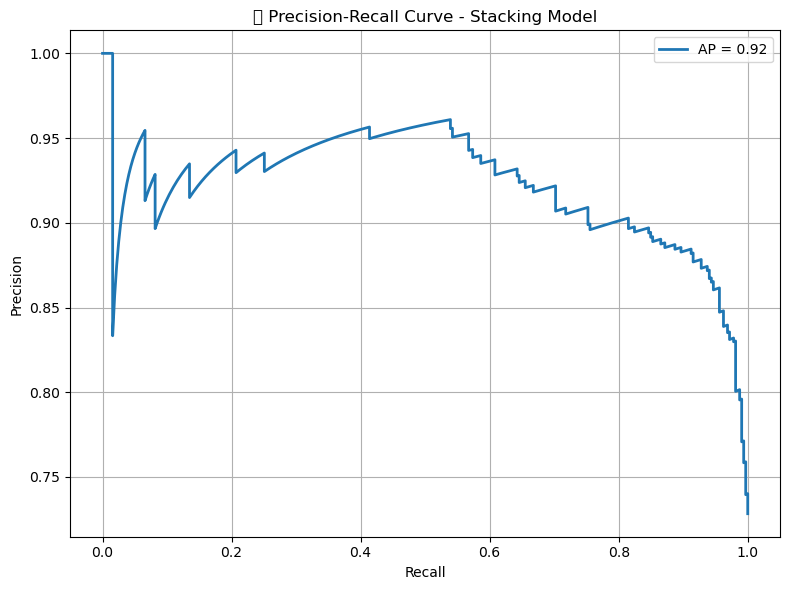

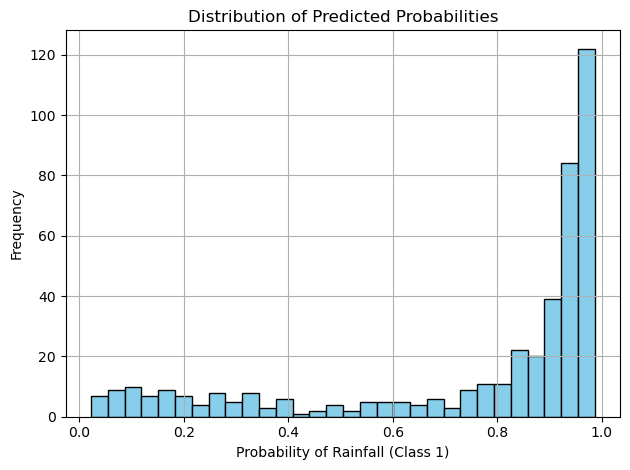

In [13]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}', linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('📈 Precision-Recall Curve - Stacking Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.hist(y_proba, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Probability of Rainfall (Class 1)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

### 📐 Step 9: Precision-Recall Curve & Probability Analysis

**📌 What We Did**
- Computed the **Precision-Recall Curve** to understand how precision and recall vary with different thresholds.
- Calculated the **Average Precision Score**, which summarizes the curve in a single metric.
- Plotted:
  - **Precision vs Recall** to explore optimal threshold trade-offs.
  - **Histogram of Predicted Probabilities** to see how confident the model is across predictions.

**📊 Why This Matters**
- Helps to decide the **best threshold** beyond default 0.5 for making predictions (e.g., 0.6 or 0.75).
- Useful for imbalanced data or when **precision or recall** is more important than just accuracy.
- Visualizes model confidence and class separation through predicted probabilities.


🔍 Evaluating Logistic Regression...
📊 Accuracy: 0.8402
📈 ROC AUC Score: 0.8604
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.59      0.67       119
           1       0.86      0.93      0.89       319

    accuracy                           0.84       438
   macro avg       0.81      0.76      0.78       438
weighted avg       0.83      0.84      0.83       438



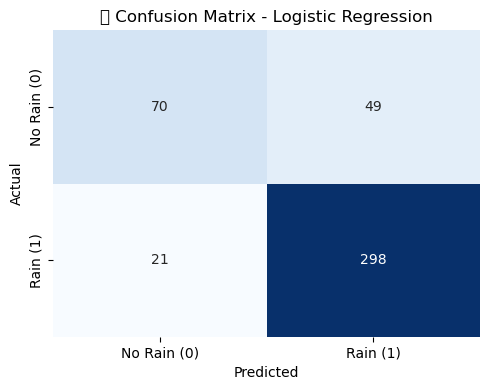


🔍 Evaluating Decision Tree...
📊 Accuracy: 0.8447
📈 ROC AUC Score: 0.8577
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.57      0.67       119
           1       0.86      0.95      0.90       319

    accuracy                           0.84       438
   macro avg       0.83      0.76      0.78       438
weighted avg       0.84      0.84      0.84       438



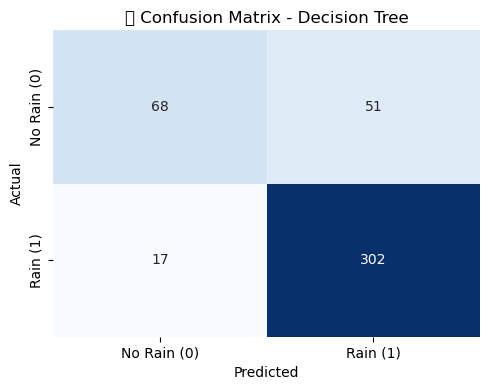


🔍 Evaluating Random Forest...
📊 Accuracy: 0.8584
📈 ROC AUC Score: 0.8577
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.64      0.71       119
           1       0.87      0.94      0.91       319

    accuracy                           0.86       438
   macro avg       0.84      0.79      0.81       438
weighted avg       0.85      0.86      0.85       438



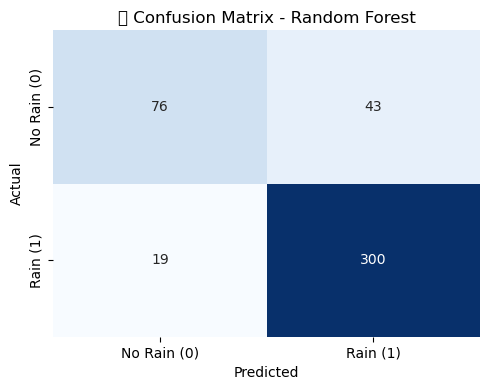


🔍 Evaluating XGBoost...
📊 Accuracy: 0.8653
📈 ROC AUC Score: 0.8605
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.63      0.72       119
           1       0.87      0.95      0.91       319

    accuracy                           0.87       438
   macro avg       0.85      0.79      0.81       438
weighted avg       0.86      0.87      0.86       438



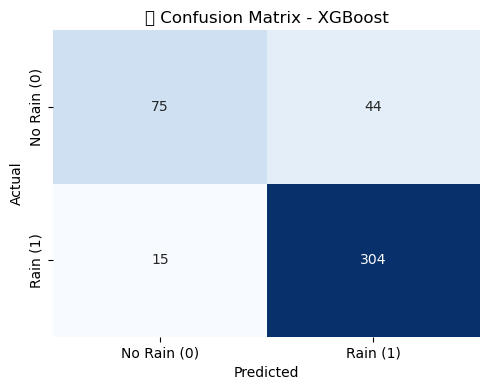


🔍 Evaluating LightGBM...
[LightGBM] [Info] Number of positive: 1331, number of negative: 421
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2842
[LightGBM] [Info] Number of data points in the train set: 1752, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.759703 -> initscore=1.151053
[LightGBM] [Info] Start training from score 1.151053
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

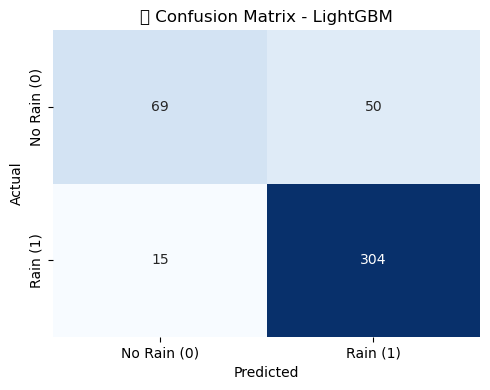


🔍 Evaluating Stacking Ensemble...
📊 Accuracy: 0.8516
📈 ROC AUC Score: 0.8625
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.61      0.69       119
           1       0.86      0.94      0.90       319

    accuracy                           0.85       438
   macro avg       0.83      0.77      0.80       438
weighted avg       0.85      0.85      0.84       438



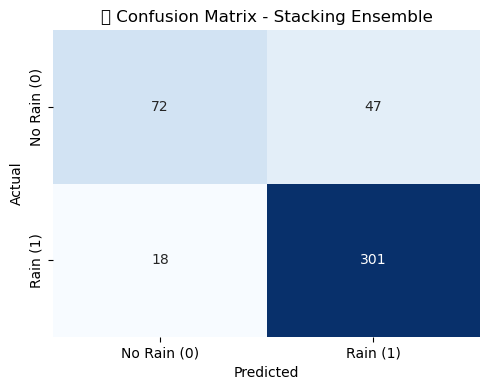

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report, confusion_matrix
)

# 🔁 Models Dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, random_state=42),  # Or DecisionTreeClassifier()
    "Random Forest": RandomForestClassifier(n_estimators=500, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=800, learning_rate=0.0073, max_depth=12,
                              min_child_weight=1, subsample=0.995, colsample_bytree=0.815,
                              gamma=1.266, reg_alpha=4.248, reg_lambda=3.408,
                              objective='binary:logistic', eval_metric='logloss',
                              use_label_encoder=False, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=500, learning_rate=0.01, max_depth=10,
                               subsample=0.9, colsample_bytree=0.8, random_state=42),
    "Stacking Ensemble": stack_model
}

# 🎯 Evaluation
for name, model in models.items():
    print(f"\n🔍 Evaluating {name}...")

    if name != "Stacking Ensemble":
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    report = classification_report(y_test, y_pred)

    print(f"📊 Accuracy: {acc:.4f}")
    print(f"📈 ROC AUC Score: {roc_auc:.4f}")
    print("📋 Classification Report:")
    print(report)

    # ✅ Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Rain (0)', 'Rain (1)'],
                yticklabels=['No Rain (0)', 'Rain (1)'])
    plt.title(f"🧩 Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

### 🧪 Step 10: Comparing Models (Baseline vs. Ensemble)

**📌 What We Did**
- Trained and evaluated several classifiers on the validation set:
  - Logistic Regression
  - Decision Tree / Gradient Boosting
  - Random Forest
  - XGBoost
  - LightGBM
  - ✅ Our Stacking Ensemble (already trained)

**📊 Evaluation Metrics Used**
- Accuracy
- ROC-AUC Score
- Classification Report
- Confusion Matrix (visualized using heatmaps)

**📈 Why This Matters**
- Helps **benchmark model performance** across various algorithms.
- Verifies if the ensemble actually **outperforms individual learners**.
- The confusion matrix gives a clear view of **true/false positives & negatives**.

This comparison guides us toward choosing the best model for our final Kaggle submission.

In [15]:
from sklearn.metrics import accuracy_score, roc_auc_score

print("Validation Accuracy:", accuracy_score(y_test, stack_model.predict(X_test)))
print("Validation ROC-AUC:", roc_auc_score(y_test, stack_model.predict_proba(X_test)[:, 1]))


Validation Accuracy: 0.8515981735159818
Validation ROC-AUC: 0.8624641079002133


In [16]:
# feature_engineering
test_features_engineered = feature_pipeline.transform(df_test)

# feature selection
test_features_selected = test_features_engineered[[x for x in df_refined.columns.tolist() if x != 'rainfall']]

# feature preprocessing

test_features_preprocessed = pipeline.transform(test_features_selected)

In [17]:
joblib.dump(feature_pipeline,'feature_engineering.pkl')

joblib.dump(df_refined.columns.tolist(),'columns.pkl')

['columns.pkl']

### 🧬 Step 11: Final Test Set Preparation Before Prediction

**📌 What We Did**
- ✅ Applied **feature engineering pipeline** to raw test data (`feature_pipeline.transform`)
- ✅ Selected only the relevant features based on what was used in the refined training set (excluding `rainfall`)
- ✅ Applied the **saved preprocessing pipeline** to transform the test data before inference

**💡 Why This Matters**
- Ensures that the test data goes through the **exact same transformations** as training data
- Keeps features **aligned with model expectations**
- Critical for **making valid predictions** that generalize well on unseen data

In [18]:
y_pred_proba = stack_model.predict_proba(test_features_preprocessed)[:,1]

### 🔮 Step 12: Generating Predicted Probabilities on Test Set

**📌 What We Did**
- Used the final `stack_model` to predict the **probability of rainfall** on the preprocessed test data.
- Extracted only the probability of class 1 (Rain) using `[:, 1]`.

**💡 Why This Matters**
- Probabilities give a **confidence level** for each prediction.
- Helps in **threshold tuning** for optimal decision-making (especially in imbalanced data scenarios).

In [19]:
# creating the submission file
submission = df_test[['id']]

# adding the rainfall predictions
submission['rainfall'] = y_pred_proba

# saving to a csv
submission.to_csv('submission.csv',index=False)

### 📤 Step 13: Creating the Final Kaggle Submission File

**📌 What We Did**
- Created a new DataFrame with just the required `id` column.
- Added the predicted rainfall probabilities as the `rainfall` column.
- Saved the file in the correct format as `submission.csv`.

**💡 Why This Matters**
- This file is used for submission on Kaggle. The `rainfall` column should reflect the **probability of rain**, not just binary labels — especially in probabilistic challenges.

In [20]:
joblib.dump(stack_model,'model.pkl')

['model.pkl']

In [21]:
df_test.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [22]:
data = df_test.iloc[0]
data = data.to_dict()
data

{'id': 2190.0,
 'day': 1.0,
 'pressure': 1019.5,
 'maxtemp': 17.5,
 'temparature': 15.8,
 'mintemp': 12.7,
 'dewpoint': 14.9,
 'humidity': 96.0,
 'cloud': 99.0,
 'sunshine': 0.0,
 'winddirection': 50.0,
 'windspeed': 24.3}

In [23]:
{'id': 2190.0,
 'day': 1.0,
 'pressure': 1019.5,
 'maxtemp': 17.5,
 'temparature': 15.8,
 'mintemp': 12.7,
 'dewpoint': 14.9,
 'humidity': 96.0,
 'cloud': 99.0,
 'sunshine': 0.0,
 'winddirection': 50.0,
 'windspeed': 24.3}

{'id': 2190.0,
 'day': 1.0,
 'pressure': 1019.5,
 'maxtemp': 17.5,
 'temparature': 15.8,
 'mintemp': 12.7,
 'dewpoint': 14.9,
 'humidity': 96.0,
 'cloud': 99.0,
 'sunshine': 0.0,
 'winddirection': 50.0,
 'windspeed': 24.3}

In [24]:
import requests

response = requests.post(
    url = 'http://127.0.0.1:5000/predict',
    json = {'id': 2190.0,
 'day': 1.0,
 'pressure': 1019.5,
 'maxtemp': 17.5,
 'temparature': 15.8,
 'mintemp': 12.7,
 'dewpoint': 14.9,
 'humidity': 96.0,
 'cloud': 99.0,
 'sunshine': 0.0,
 'winddirection': 50.0,
 'windspeed': 24.3}
)
response

<Response [200]>

In [25]:
response.json()

{'Probability of rain': 0.977426819908384}